<a href="https://colab.research.google.com/github/elisacomposta/YAnalysis/blob/main/y_result_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook reproduces the figures presented in the thesis, using the outputs of the simulations available in the repository.

## Setup

In [1]:
!git clone https://github.com/elisacomposta/YAnalysis

import sys
import os
from tqdm import tqdm

repo_path = os.path.abspath("./YAnalysis")
if repo_path not in sys.path:
    sys.path.append(repo_path)

Cloning into 'YAnalysis'...
remote: Enumerating objects: 283, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 283 (delta 5), reused 10 (delta 4), pack-reused 269 (from 1)
Receiving objects: 100% (283/283), 60.69 MiB | 12.98 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (227/227), done.


In [2]:
import src.utils
src.utils.SAVE = False
src.utils.SHOW = True

In [3]:
from src.utils import COALITIONS, MISINFO_LEVELS, get_files, get_random_file_from_dir, SAVE, SHOW
from src.graph import plot_final_graph, plot_population_composition
from src.opinions import plot_op_score_by_coalition
from src.misinformation import plot_shift_by_misinfo_level_runs, plot_shift_by_misinfo_level_coalitions
from src.interactions import plot_in_group_ratio_by_recsys, plot_pos_neg_in_vs_out_boxplot, plot_interactions_per_user_boxplot
from src.toxicity import plot_combined_toxicity_diff, plot_toxicity_post_comment

In [15]:
RECSYS_RANDOM_PATH = '/content/YAnalysis/simulations/ContentRecSys'
RECCSYS_DEFAULT_PATH = '/content/YAnalysis/simulations/ReverseChronoFollowersPopularity'

sim_names_recsys_random = ['d21a100m00x', 'd21a100m05x', 'd21a100m10x', 'd21a100m50x']
sim_names_recsys_default = ['d21a100m00d', 'd21a100m05d', 'd21a100m10d', 'd21a100m50d']

sim_paths_recsys_random = [os.path.join(RECSYS_RANDOM_PATH, sim) for sim in sim_names_recsys_random]
sim_paths_recsys_default = [os.path.join(RECCSYS_DEFAULT_PATH, sim) for sim in sim_names_recsys_default]

sim_path_recsys = sim_paths_recsys_default # Simulations with default recsys as default to plot

## 1. Coalition distribution in the population
Distribution of the number of agents per political coalition in the simulations. Each box
represents the distribution of values across simulation runs.

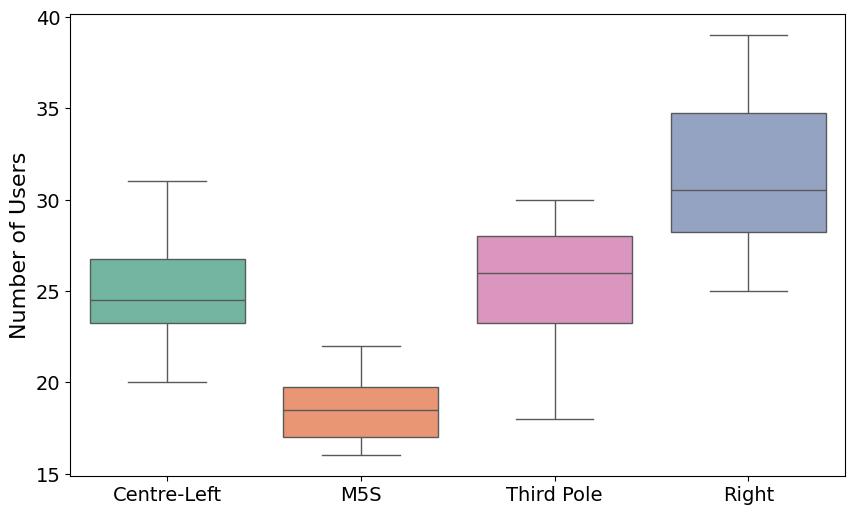

In [5]:
plot_population_composition(sim_path_recsys)

## 2. Network structure
Final structure of the social network in four simulations with different levels of misinformation.

**Nodes** are agents, colored according to the supported coalition; the bold **borders** indicate
misinformation agents. <br>
The **dimension** of the nodes indicates the number of connections of an agent.

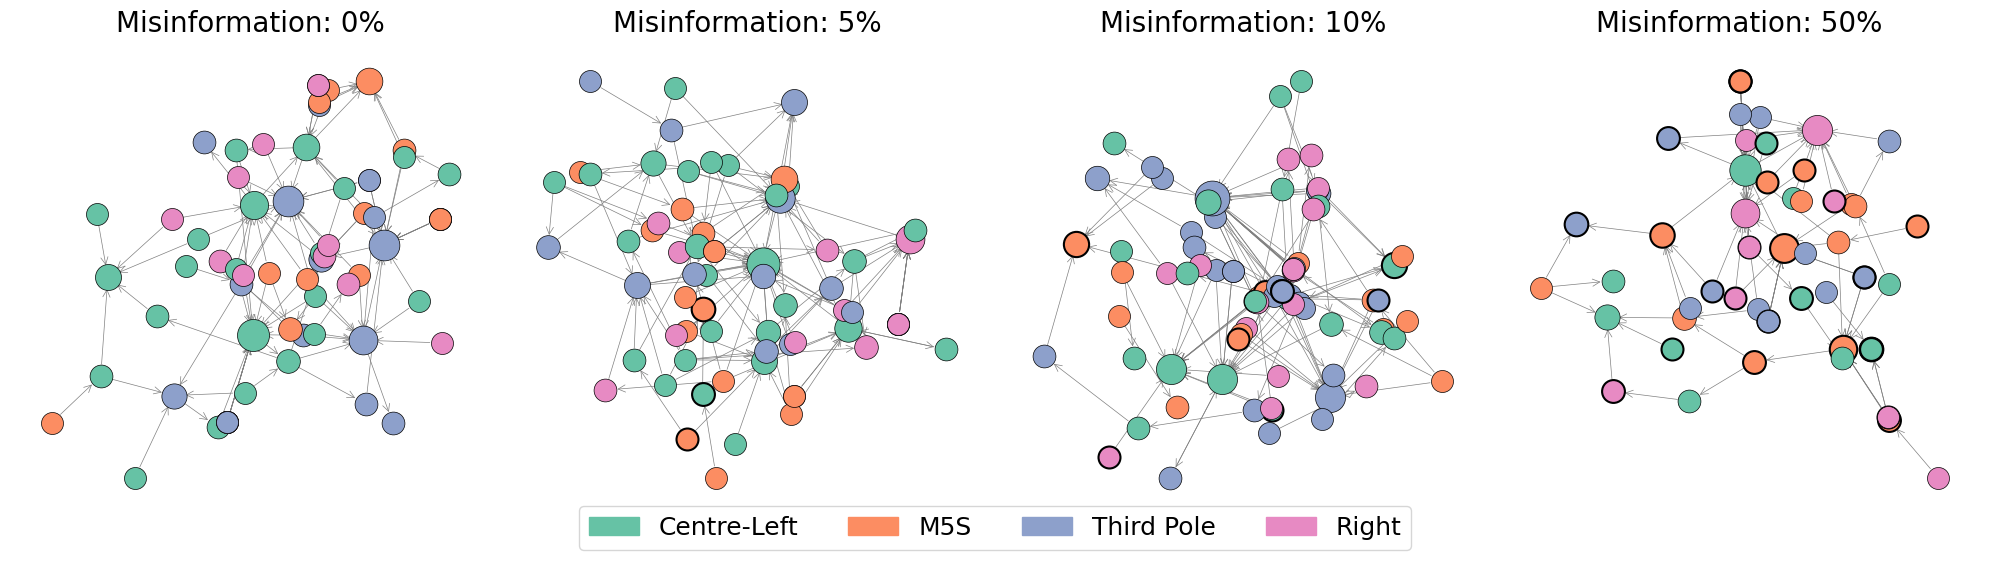

In [6]:
simulations_to_plot = []
for sim_path in sim_path_recsys:
    simulations_to_plot.append(get_random_file_from_dir(sim_path))
plot_final_graph(simulations_to_plot)

## 3. Interactions
The possible interaction types are:
*post, comment, like, dislike, follow, unfollow*.

### 3.1 In-group and out-group interactions across coalitions
Percentage of interactions directed toward the same group (in-group), divided into positive
interactions (*like*, *follow*) and negative interactions (*dislike*, *unfollow*), for each coalition, with each
point representing the ratio calculated from a single simulation run.

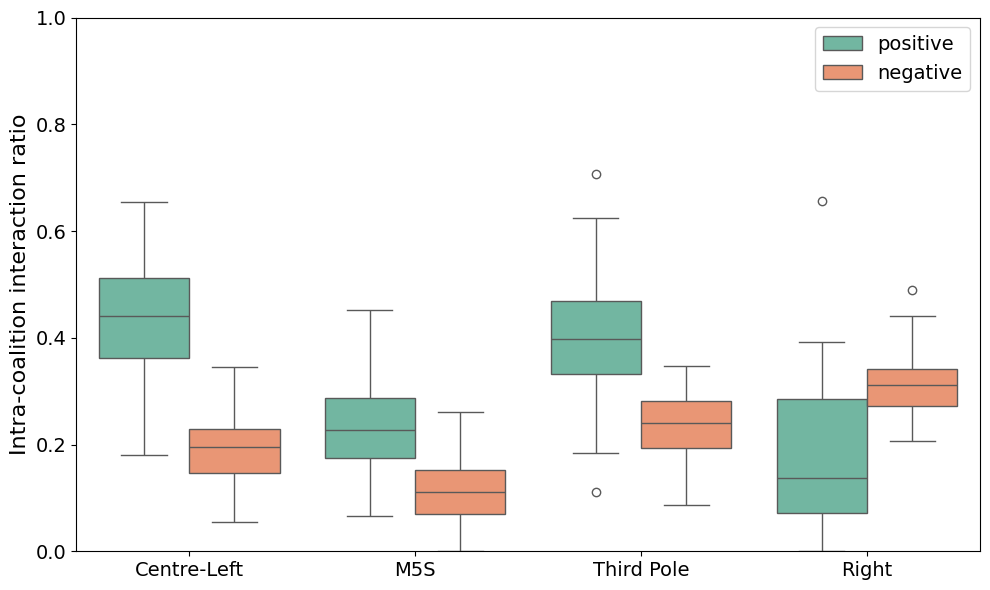

In [7]:
plot_pos_neg_in_vs_out_boxplot(sim_paths_recsys_default)

### 3.2 Interaction activity per user type
Number of interactions per user, distinguishing by base and misinformation agents.

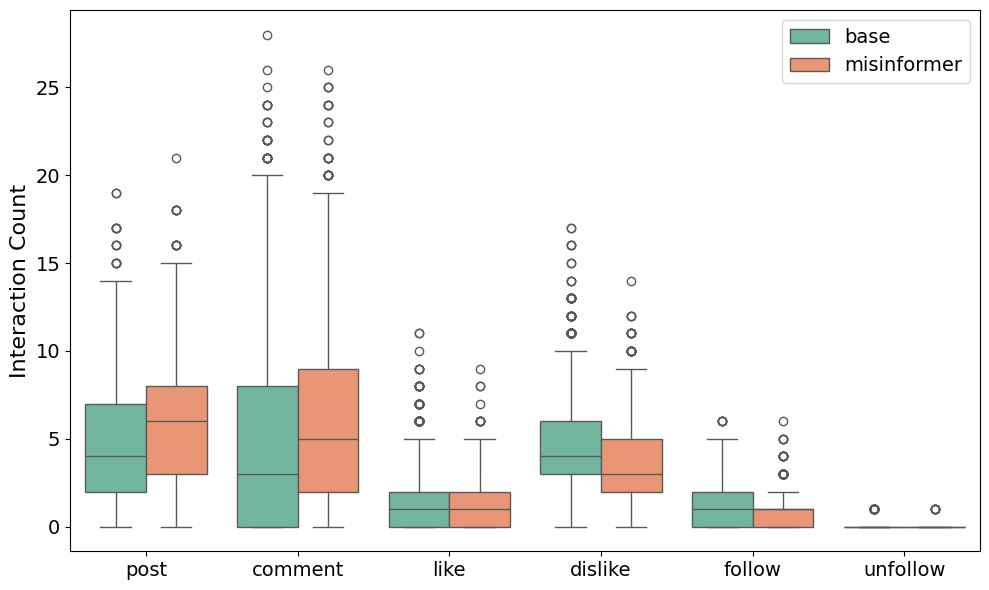

In [8]:
plot_interactions_per_user_boxplot(sim_paths_recsys_default)

## 4. Opinion evolution
Evolution of opinion for each topic, comparing LLM-assigned score (*score_llm*, top row) and
the one assigned by a traditional model (*score*, bottom row). Each line represents a coalition, with
a 95% confidence interval.

The following plot is related to the runs of the simulation setup with the default recsys and 0% misinformation.

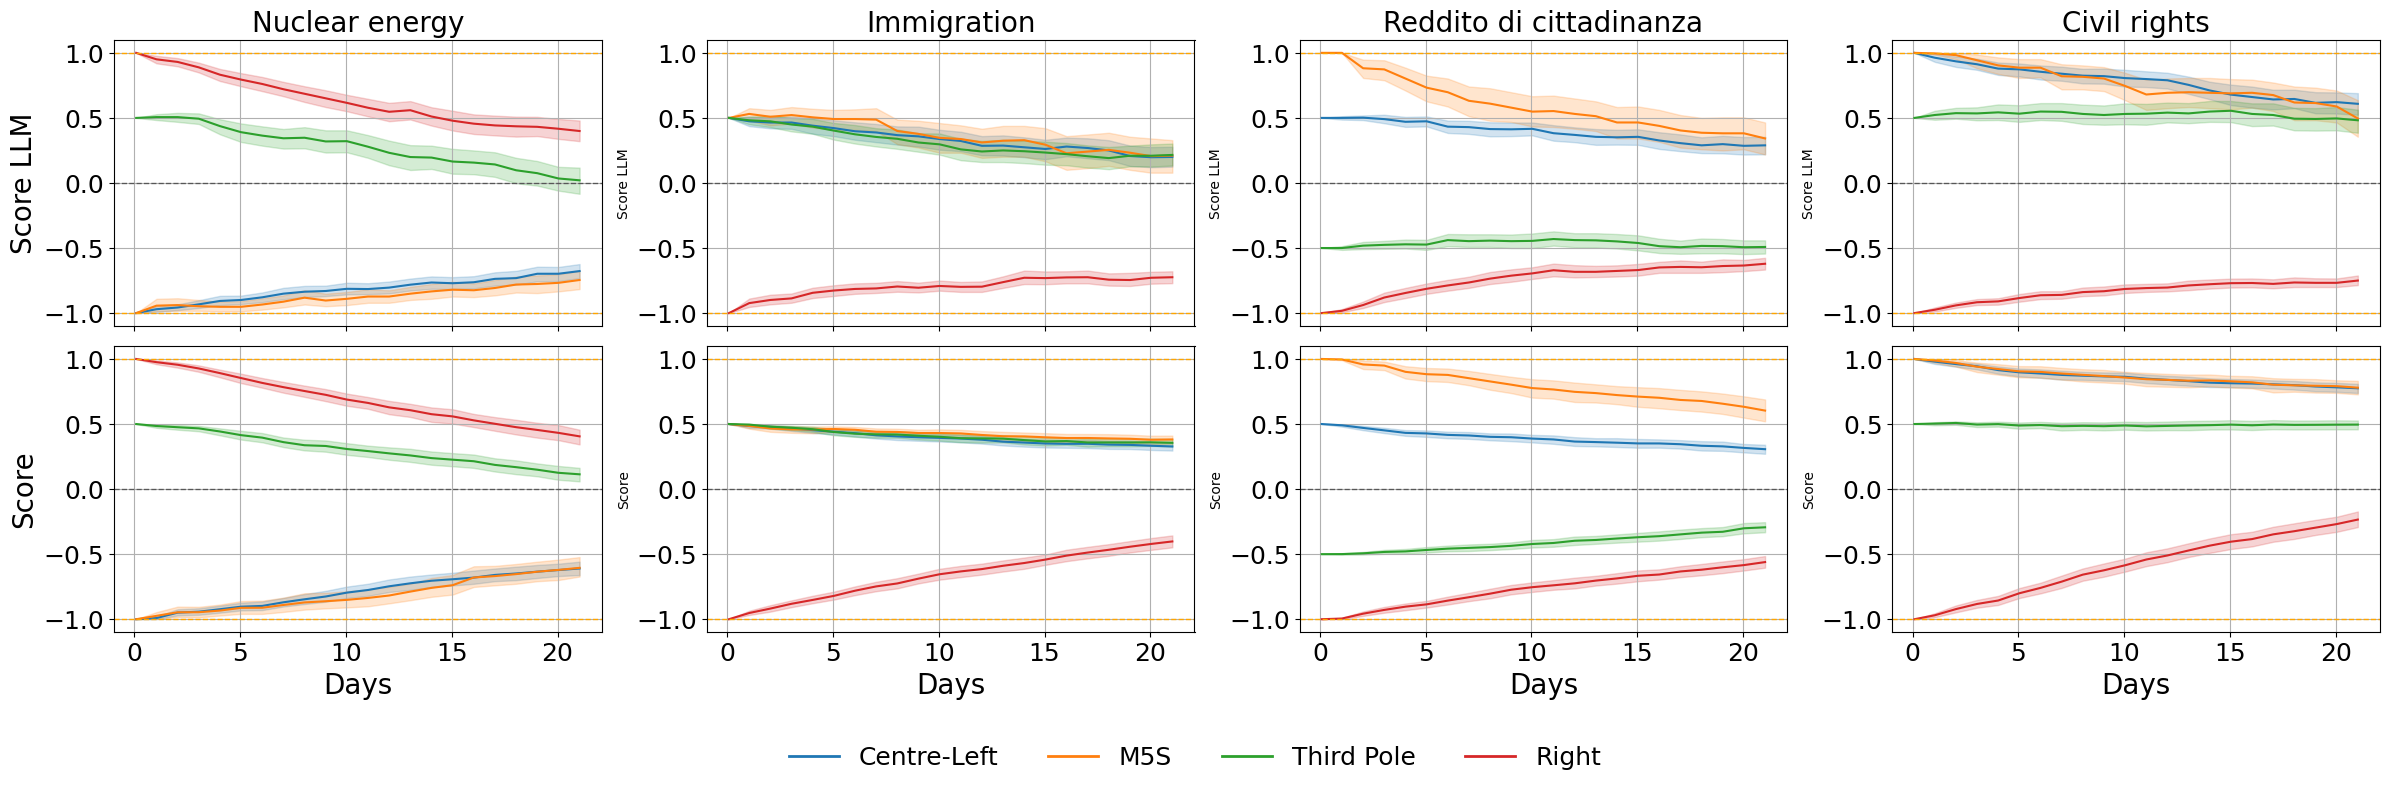

In [9]:
plot_op_score_by_coalition(sim_path_recsys[0])

## Misinformation
Distribution of opinion shift (difference between final and initial opinion) for each topic an
coalition, with varying levels of misinformation.

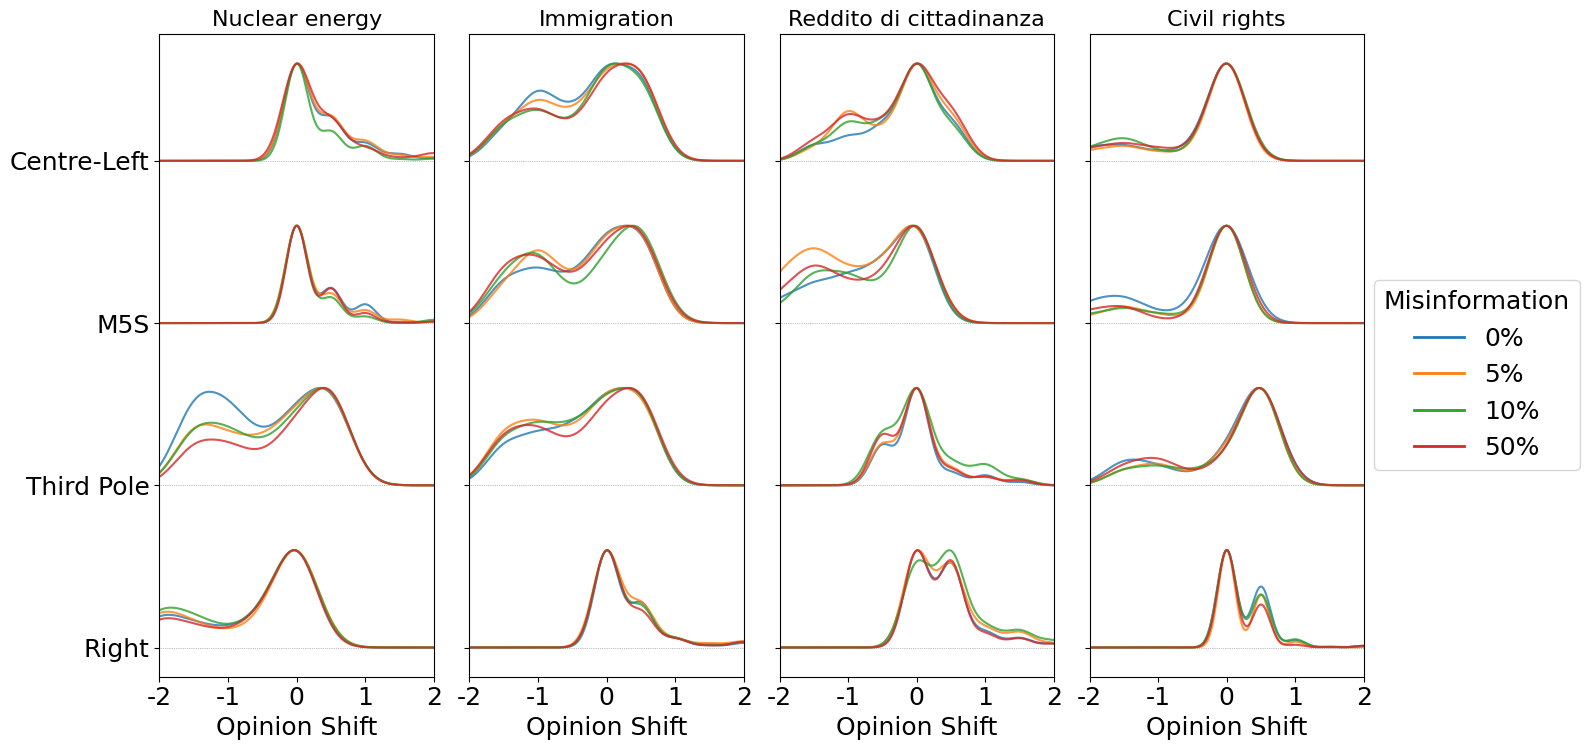

In [10]:
plot_shift_by_misinfo_level_coalitions(sim_path_recsys)

## Toxicity analysis

### 1. Toxicity across coalitions and content types
Toxicity of LLM-generated texts, in posts and comments per political coalition. Each box
summarizes toxicity values from all posts or comments in the simulations. The y axis is in logarithmic
scale to highlight the skew of the distribution.

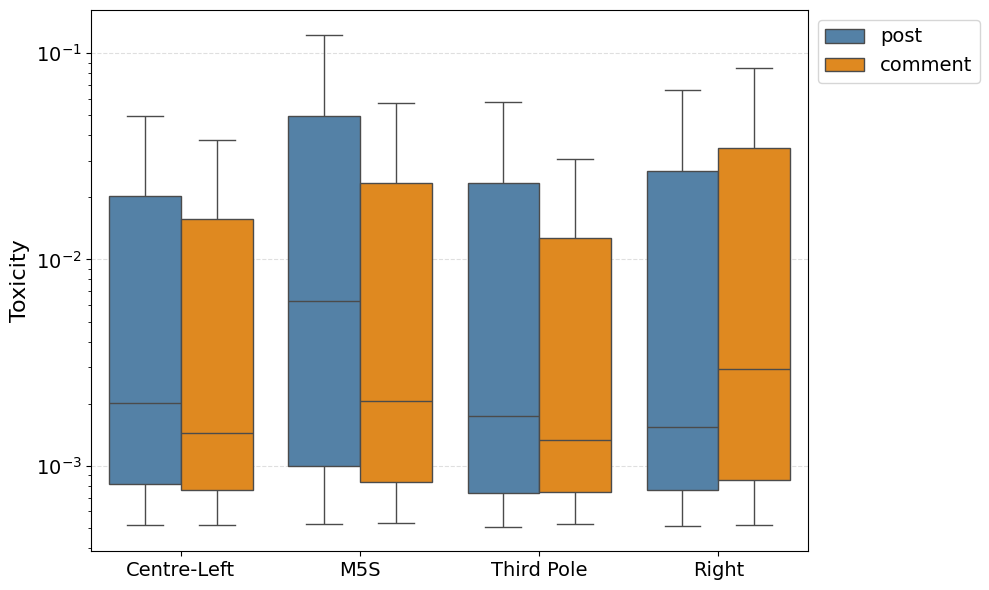

In [11]:
plot_toxicity_post_comment(sim_paths_recsys_random + sim_paths_recsys_default)

### Toxicity toward in-group and out-group
Distribution of the difference in mean toxicity toward out-group and in-group comments for
each user in each simulation.

To enable the comparison with the real-world data, the dataset path should be provided.

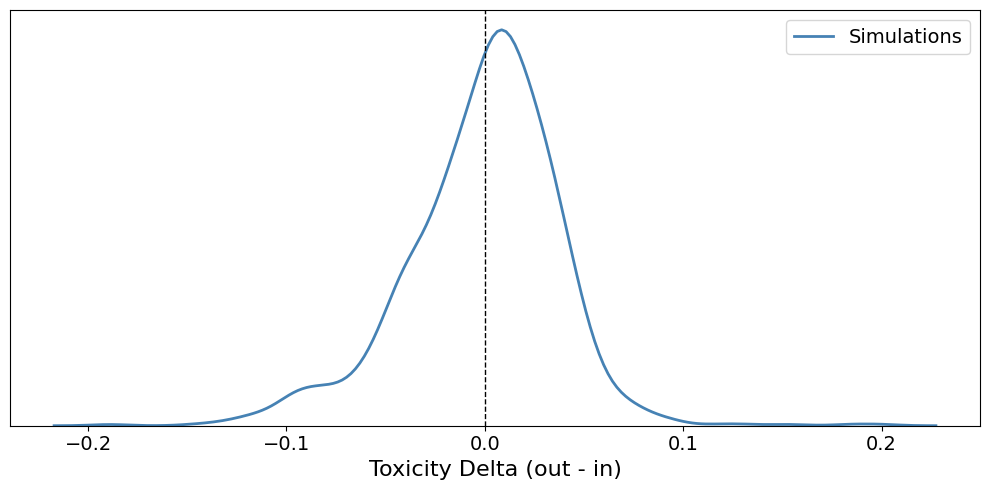

In [13]:
plot_combined_toxicity_diff(sim_paths_recsys_random + sim_paths_recsys_default)

## Content recommendation algorithms
Percentage of in-group interactions by interaction type, comparing two recommendation algorithms. Each point in the boxplot represents data from a single simulation run.

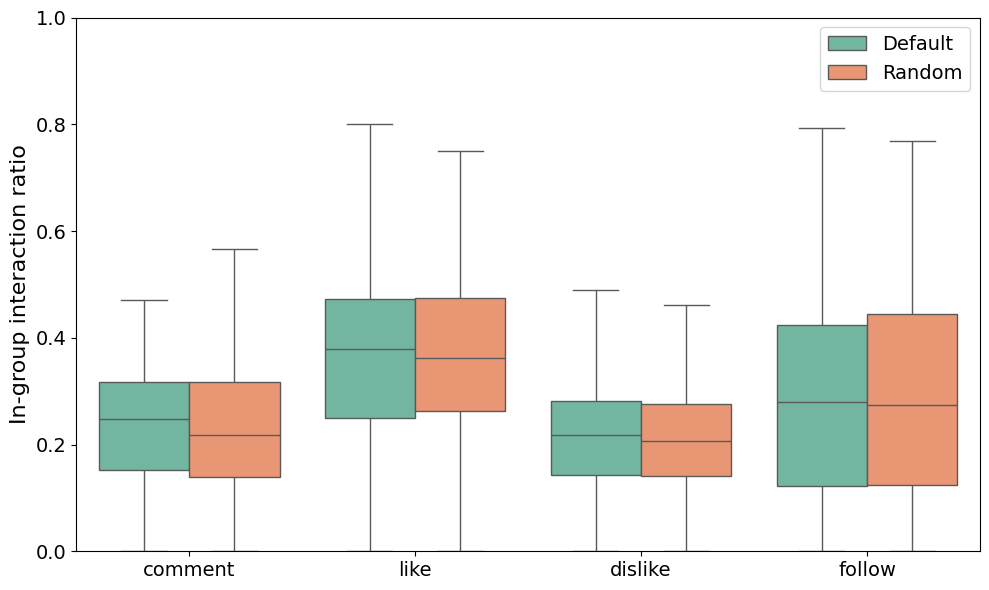

In [14]:
plot_in_group_ratio_by_recsys(sim_paths_recsys_default, sim_paths_recsys_random)